# Assignment \#1
# Chebyshev and Lissajous

Gisu Ham 10134838  
Justin Park 10115894



## 1) Chebyshev polynomials

https://en.wikipedia.org/wiki/Chebyshev_polynomials

The Chebyshev polynomials, named after Pafnuty Chebyshev, are a sequence of orthogonal polynomials.

In the study of differential equations they arise as the solution to the Chebyshev differential equations

 $$ \left(1-x^{2}\right)y''-xy'+n^{2}y=0 $$
 
and

 $$ \left(1-x^{2}\right)y''-3xy'+n(n+2)y=0 $$

The Chebyshev polynomials of the first kind are defined by the recurrence relation

 $$\begin{aligned}T_{0}(x)&=1\\T_{1}(x)&=x\\T_{n+1}(x)&=2xT_{n}(x)-T_{n-1}(x).\end{aligned} $$

Task 1a: write a function to evaluate the Chebyshev polynomials using only core Python and the "math" module.  

Your function should be defined so that it can be called as follows:

   y = Chebyshev1_recursive(x, n)
   
in other words, the degree $n$ and a single value $x$ are provided, and a single value equal to $T_n(x)$ should be returned.

(Don't worry too much about optimization or efficiency)

Task 1b: use matplotlib to generate a good quality figure containing the first five (n=0 to 4) Chebyshev polynomials plotted between x=-1 and x=+1.

In [1]:
import numpy
import math
import matplotlib.pyplot as plt

In [2]:
def Chebyshev1_recursive(x,n):
    #base case
    if n==0:
        return 1
    elif n==1:
        return x
    elif n>=2:
        return 2*x*Chebyshev1_recursive(x,n-1)-Chebyshev1_recursive(x,n-2)
    else:
        return None

In [3]:
Chebyshev1_recursive(2.67,2),Chebyshev1_recursive(2,3),Chebyshev1_recursive(2,5)

(13.2578, 26, 362)

In [4]:
#checking one of the value with numpy
numpy.polynomial.chebyshev.chebval(2, [0,0,0,0,0,1])

362.0

In [5]:
x=[]
for i in range (-100,101,1):
    x.append(i/100)

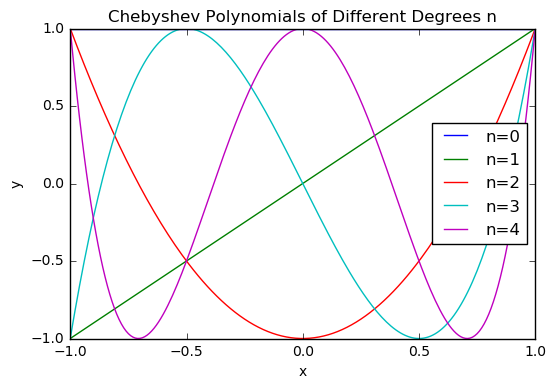

In [6]:
for n in range(0,5):
    y=[]
    for m in x:
        y.append(Chebyshev1_recursive(m,n))
    plt.plot(x,y,label="n="+str(n))
plt.legend(loc=7) 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Chebyshev Polynomials of Different Degrees n')
# The x and y axis for the Chebyshev Polynomials are dimensionless, so a blank label is appropriate for this case.
plt.show()

## 2) Lissajous figures

https://en.wikipedia.org/wiki/Lissajous_curve
    
In mathematics, a Lissajous curve <pre>/ˈlɪsəʒuː/</pre> is the graph of a system of parametric equations

 $$ x=A\sin(at+\delta ) \\
    y=B\sin(bt)         $$
    
The appearance of the figure is highly sensitive to the ratio  $a/b$.  Rational ratios produce closed (connected) or "still" figures, while irrational ratios produce figures that appear to rotate.

Task 2a: What is the smallest value of $t$ required in theory to produce a closed curve for the parameters a = 5, b = 6, $\delta=π/2$?  Use matplotlib to generate a good-quality figure containing this curve.  Show this curve "inline" the Jupyter notebook containing your answers and also save it to a file named "lissajous.pdf" which you should submit to the D2L Dropbox folder along with this notebook.

# 2(a) 
smallest value of t needed is $2\pi$ for looping. It is the value at which the two parametric curve $x(t)$, $y(t)$ are equal and their derivatives are also equal.

# 2(b)

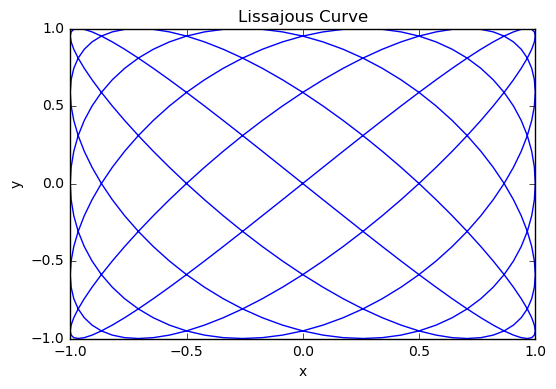

In [7]:
a=5
b=6
x=[]
y=[]
ut = 361
for i in range(0,ut):
    x.append(math.sin(a*i*math.pi/180))
for i in range (0,ut):
    y.append(math.sin(b*i*math.pi/180))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
# The x and y axis for the Lissjous Curve are dimensionless, so a blank label is appropriate for this case.

plt.title('Lissajous Curve')
plt.savefig("lissajous.pdf")
plt.show()


## 3) Everything is connected

Lissajous figures where a = 1, b = N (N is a natural number) and
 
 $$ \delta ={\frac {N-1}{N}}{\frac {\pi }{2}} $$
 
are Chebyshev polynomials of the first kind of degree N.

Task 3: Check this claim by comparing results from part 1 and part 2 for degree $n=5$ at the points

 $$ x_k = \cos \left( \frac{2k-1}{2n} \pi \right), \quad k=1,\ldots,n $$
 
Create a table with the results eg.

 | value  |chebyshev | lissajous | difference |
 |--------|----------|-----------|------------|
 |   0.?? |   ??.??  |   ??.??   |   ??.??    |
 |   0.?? |          |           |            |

and briefly discuss them.

In [8]:
n=5
N=5
x_k=[]
Cheb_list=[]
lissajour_list=[]
difference=[]
for k in range(1,6):
    x_k.append(math.cos((2*k-1)*math.pi/(2*n)))
for k in range(1,6):
    Cheb_list.append(Chebyshev1_recursive(x_k[k-1],n))
    lissajour_list.append(math.sin( N*(math.asin(x_k[k-1])-(N-1)*math.pi/(N*2)  )  )  )
for j in range(0,5):
    difference.append(Cheb_list[j]-lissajour_list[j])

See "Oscilloscope Music Kickstarter" on YouTube

# LIst without rounding 

In [9]:
print ('%-30s%-30s%-30s%-30s' % ('value','chebyshev','lissajous','difference'))
for i in range(0,5):
    print ('%-30s%-30s%-30s%-30s' % (x_k[i],Cheb_list[i],lissajour_list[i],difference[i]))

value                         chebyshev                     lissajous                     difference                    
0.9510565162951535            -4.440892098500626e-16        0.0                           -4.440892098500626e-16        
0.5877852522924731            0.0                           -1.2246467991473532e-16       1.2246467991473532e-16        
6.123233995736766e-17         3.0616169978683826e-16        2.4492935982947064e-16        6.123233995736762e-17         
-0.587785252292473            -7.771561172376096e-16        -3.6739403974420594e-16       -4.0976207749340364e-16       
-0.9510565162951535           4.440892098500626e-16         4.898587196589413e-16         -4.5769509808878667e-17       


# List with rounding

In [10]:
print ('%-30s%-30s%-30s%-30s' % ('value','chebyshev','lissajous','difference'))
for i in range(0,5):
    print ('%-30f%-30f%-30f%-30f' % (x_k[i],Cheb_list[i],lissajour_list[i],difference[i]))

value                         chebyshev                     lissajous                     difference                    
0.951057                      -0.000000                     0.000000                      -0.000000                     
0.587785                      0.000000                      -0.000000                     0.000000                      
0.000000                      0.000000                      0.000000                      0.000000                      
-0.587785                     -0.000000                     -0.000000                     -0.000000                     
-0.951057                     0.000000                      0.000000                      -0.000000                     


The numbers obtained in 'list without rounding' do not have the exact representation in the number system that python uses (binary) because of representation error.

In [11]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Arguments:
    
      *fname*:
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
        If *fname* is not a string, remember to specify *format* to
        ensur